In [1]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt

def obtener_datos(nx,nz,nt,cubo_path):
    
    filename = cubo_path

    with open(filename, "rb") as fid:
        data = np.fromfile(fid, dtype=np.float32)
    
        num_rows = int(data.shape[0] / nz)
        data.resize(num_rows, nz)
        data = data.T
    
        cubo = crear_cubo(data, nx, nz, nt)
       
        return cubo

@njit
def crear_cubo(datos: np.array, nx, nz, nt):
    # El cubo queda con dimensiones Nz * Nx * Nt
    cubo = np.zeros((nz, nx, nt), np.float32)

    for k in range(nt):
        for j in range(nx):
            for i in range(nz):
                cubo[i, j, k] = datos[i, j + (k - 1) * nx]
                    
    return cubo


In [50]:
def plot_propagacion(cubo, vel, fq, title=None, t_list=None):
  # Size
  ratio = cubo[:,:,0].shape[0] / cubo[:,:,0].shape[1]
  
  time = len(cubo[0,0,:])
  if not t_list:
    t_list = [int(time/3), int(time/2), time-1]
    
  # Colormap
  vmin = []
  vmax = []
  for t in t_list:
    vmin.append(np.min(cubo[:,:,t]))
    vmax.append(np.max(cubo[:,:,t]))
  
  vmin = np.min(vmin)
  vmax = np.max(vmax)
  
  # Posiciones
  txt_x = 0.05
  if ratio == 1:
    row_size = 3
    col_size = 9
    txt_y = 0.89
    title_y = 0.92
  elif ratio < 1:
    row_size = 2
    col_size = 11
    txt_y = 0.78
    title_y = 0.85
    
  fig, axs = plt.subplots(1,3, figsize=(col_size, row_size))
    
  for index, ax in enumerate(axs.ravel()):
    t = t_list[index]
    im = ax.imshow(cubo[:,:,t], cmap="jet", vmin=vmin, vmax=vmax)
    # Para el caso rash
    if ratio < 1:
      ax.invert_yaxis()
    
    if not index:
      ax.text(txt_x, txt_y, f"{fq} Hz", transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5), fontsize=9)
    
    plt.colorbar(im, ax=ax, shrink=0.8)

  plt.suptitle(fr"{title}, vel={vel} $km/s$", y=title_y)
  fig.tight_layout()
  plt.show()


# Pruebas de sintonización CPML

Pruebas sobre el propagador de c para los siguientes parámetros de CPML:

```C
int borde = 30; // amount of CPML grid points
cpml->n_cpml_x = borde;
cpml->n_cpml_z = borde;
cpml->CPML_layer_power = 2; // attenuation power in CPML formula
cpml->R = 0.0001;           // see Komatisch and Martin 2007
cpml->kappa_max = 1;        // for the definition of the constants
cpml->CPML_X_MAX = true;    // true        //turn cpml layers on (true) or off (false)
cpml->CPML_X_MIN = true;    // true
cpml->CPML_Z_MAX = true;    // true
cpml->CPML_Z_MIN = true;    // true
```

## Cubo propagacion original

In [63]:
cubo_path = r"C:\Users\juan9\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Academico\Maestria Geofisica\Tesis\Codigo\Juan-Diego\propagation-cpml-C-original\propagacion2.bin"

nx = 200
nz = 200
nt = 400
fq = 10
vel = 1200

cubo = obtener_datos(nx,nz,nt,cubo_path)

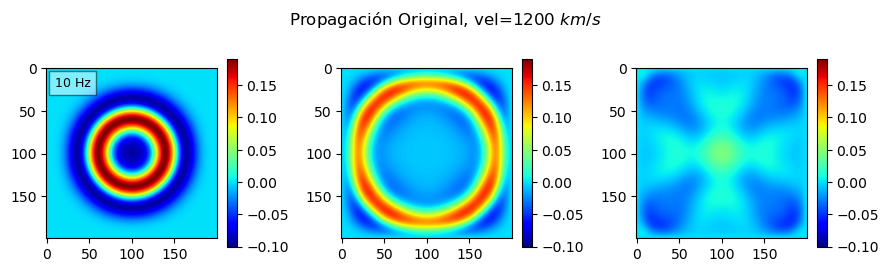

In [64]:
plot_propagacion(cubo, vel, fq, "Propagación Original", t_list=[150, 210, 290])

Snap sin atenuar el color

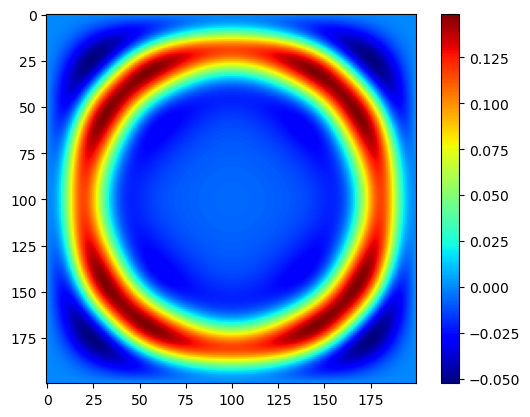

In [70]:
plt.figure()
plt.imshow(cubo[:,:,210], cmap='jet')
plt.colorbar()
plt.show()

# Propagación código modificado

## Cambio de geometría y posición de la fuente

In [72]:
cubo_path = r"C:\Users\juan9\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Academico\Maestria Geofisica\Tesis\Codigo\Juan-Diego\propagation-cpml-C\propagacion2.bin"

nx = 450
nz = 150
nt = 800
vel = 1200
fq = 10

cubo = obtener_datos(nx,nz,nt, cubo_path)

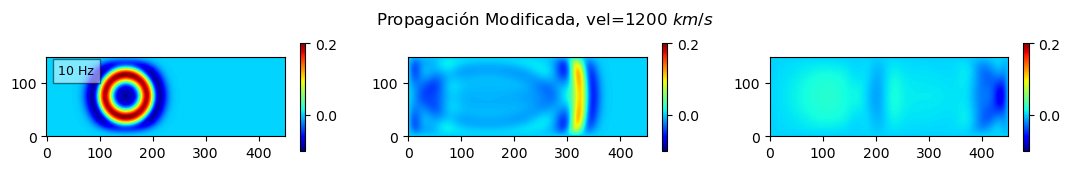

In [73]:
plot_propagacion(cubo, vel, fq, "Propagación Modificada", t_list=[150, 340, 550])

Snap sin atenuar el color

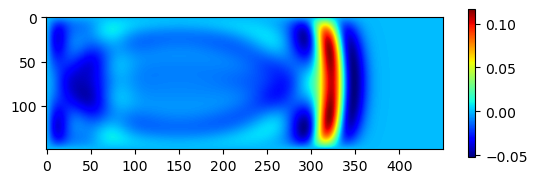

In [62]:
plt.figure()
plt.imshow(cubo[:,:,340], cmap='jet')
plt.colorbar(shrink=0.4)
plt.show()

## Cambio de frecuencia de la fuente

In [74]:
cubo_path = r"C:\Users\juan9\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Academico\Maestria Geofisica\Tesis\Codigo\Juan-Diego\propagation-cpml-C\propagacion2.bin"

nx = 450
nz = 150
nt = 800
vel = 1200
fq = 16

cubo = obtener_datos(nx,nz,nt, cubo_path)

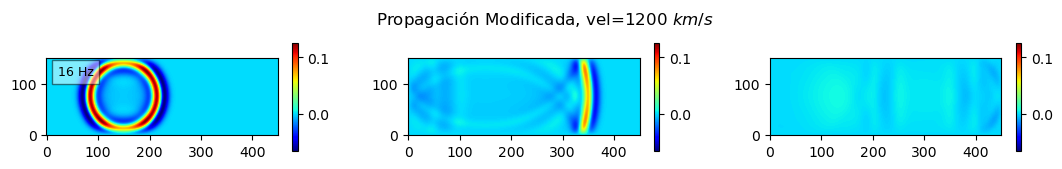

In [75]:
plot_propagacion(cubo, vel, fq, "Propagación Modificada", t_list=[150, 340, 550])

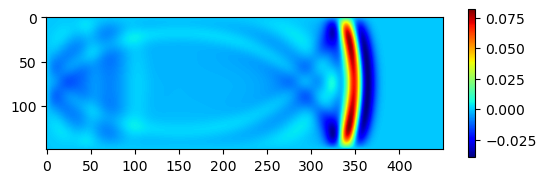

In [76]:
plt.figure()
plt.imshow(cubo[:,:,340], cmap='jet')
plt.colorbar(shrink=0.4)
plt.show()

## Cambio del paso espacial $dh$

Previamente $dh = 2$\
Ahora $dh = 3.3333$

In [77]:
cubo_path = r"C:\Users\juan9\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Academico\Maestria Geofisica\Tesis\Codigo\Juan-Diego\propagation-cpml-C\propagacion2.bin"

nx = 450
nz = 150
nt = 800
vel = 1200
fq = 16

cubo = obtener_datos(nx,nz,nt, cubo_path)

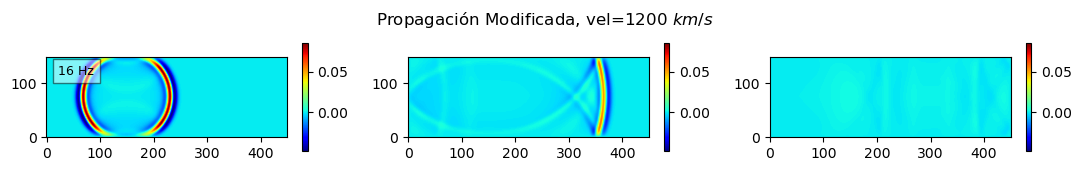

In [78]:
plot_propagacion(cubo, vel, fq, "Propagación Modificada", t_list=[150, 340, 550])

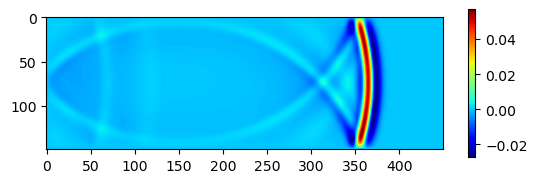

In [79]:
plt.figure()
plt.imshow(cubo[:,:,340], cmap='jet')
plt.colorbar(shrink=0.4)
plt.show()

## Cambio de tipo de fuente a gausiana negativa

In [80]:
cubo_path = r"C:\Users\juan9\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Academico\Maestria Geofisica\Tesis\Codigo\Juan-Diego\propagation-cpml-C\propagacion2.bin"
cubo = obtener_datos(nx,nz,nt, cubo_path)

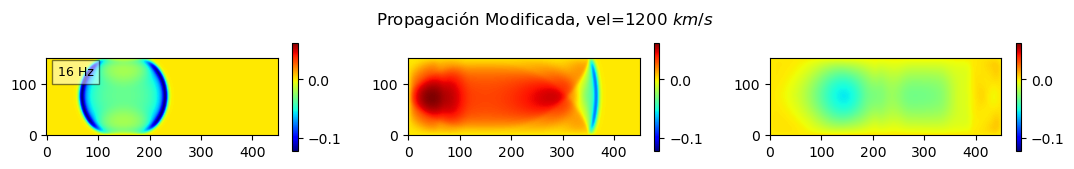

In [82]:
plot_propagacion(cubo, vel, fq, "Propagación Modificada", t_list=[150, 340, 550])

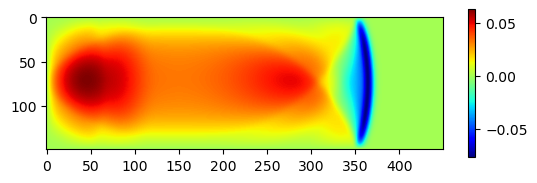

In [83]:
plt.figure()
plt.imshow(cubo[:,:,340], cmap='jet')
plt.colorbar(shrink=0.4)
plt.show()

## Cambio de velocidad
Anteriormente $v = 1200 \: km/s$ \
Ahora $v = 3000 \: km/s$

In [89]:
cubo_path = r"C:\Users\juan9\OneDrive - UNIVERSIDAD INDUSTRIAL DE SANTANDER\Academico\Maestria Geofisica\Tesis\Codigo\Juan-Diego\propagation-cpml-C\propagacion2.bin"

vel = 3000
cubo = obtener_datos(nx,nz,nt, cubo_path)

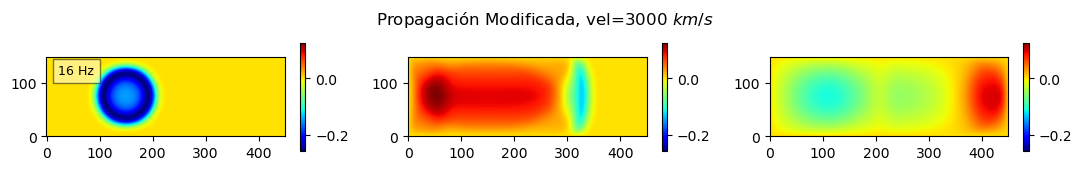

In [90]:
plot_propagacion(cubo, vel, fq, "Propagación Modificada", t_list=[150, 340, 550])

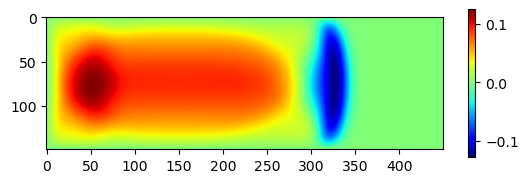

In [91]:
plt.figure()
plt.imshow(cubo[:,:,340], cmap='jet')
plt.colorbar(shrink=0.4)
plt.show()